<a href="https://colab.research.google.com/github/samadhiy/22UG2-0013/blob/main/Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project – House Price Prediction

Task D1 — Data Loading & Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Load house price dataset
house_df = pd.read_csv("House_Prices.csv")

print("First 5 rows of House Prices Dataset:")
print(house_df.head())
print("\n" + "="*50 + "\n")

print("Dataset Information:")
print(house_df.info())
print("\n" + "="*50 + "\n")

print("Descriptive Statistics:")
print(house_df.describe())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(house_df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Dataset Shape:", house_df.shape)
print("Features (X): ['Area (sqft)', 'Bedrooms', 'Age (years)']")
print("Target (y): 'Price (Lakhs)'")

First 5 rows of House Prices Dataset:
   Area (sqft)  Bedrooms  Age (years)  Price (Lakhs)
0         1000         2           10             65
1          800         1           15             48
2         1200         3            8             85
3         1500         4            5            120
4          900         2           12             60


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Area (sqft)    20 non-null     int64
 1   Bedrooms       20 non-null     int64
 2   Age (years)    20 non-null     int64
 3   Price (Lakhs)  20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes
None


Descriptive Statistics:
       Area (sqft)   Bedrooms  Age (years)  Price (Lakhs)
count    20.000000  20.000000    20.000000      20.000000
mean   1327.500000   2.750000     9.900000      94.450000
std     417.850074 

Task D2 — Multiple Linear Regression Model Training

In [6]:
# Prepare data
X_house = house_df[['Area (sqft)', 'Bedrooms', 'Age (years)']]
y_house = house_df['Price (Lakhs)']

# Create and train model
house_model = LinearRegression()
house_model.fit(X_house, y_house)

print("Regression Coefficients:")
for feature, coef in zip(['Area', 'Bedrooms', 'Age'], house_model.coef_):
    print(f"  {feature}: {coef:.4f}")

print(f"\nIntercept: {house_model.intercept_:.4f}")

print("\nRegression Equation:")
print(f"Price = {house_model.coef_[0]:.4f}×Area + {house_model.coef_[1]:.4f}×Bedrooms + {house_model.coef_[2]:.4f}×Age + {house_model.intercept_:.4f}")

Regression Coefficients:
  Area: 0.0780
  Bedrooms: 2.3727
  Age: -0.5237

Intercept: -10.4708

Regression Equation:
Price = 0.0780×Area + 2.3727×Bedrooms + -0.5237×Age + -10.4708


Task D3 — Model Evaluation

House Price Model Performance:
Mean Squared Error (MSE): 7.85
Root Mean Squared Error (RMSE): 2.80
R² Score: 0.9940
R² Score Percentage: 99.40%

First 10 predictions vs actual:
   Actual Price  Predicted Price  Difference   Error %
0            65        67.064226   -2.064226 -3.175733
1            48        46.467370    1.532630  3.192980
2            85        86.089856   -1.089856 -1.282184
3           120       113.441927    6.558073  5.465061
4            60        58.214043    1.785957  2.976595
5           150       152.979164   -2.979164 -1.986109
6           130       126.150835    3.849165  2.960896
7            52        50.122756    1.877244  3.610085
8            90        93.368813   -3.368813 -3.743125
9            74        76.438152   -2.438152 -3.294800


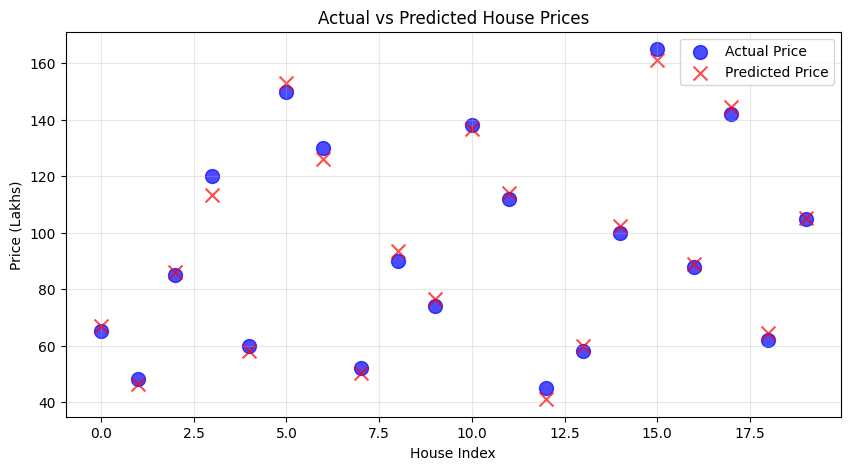

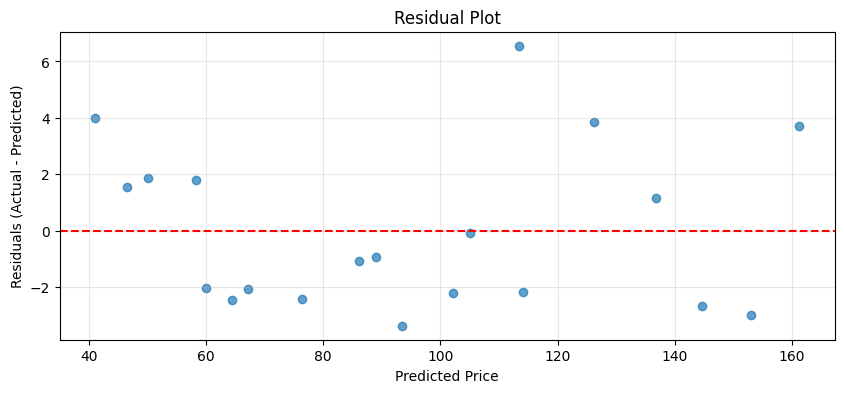

In [8]:
# Task D3 — Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_house_pred = house_model.predict(X_house)

# Calculate metrics
mse_house = mean_squared_error(y_house, y_house_pred)
r2_house = r2_score(y_house, y_house_pred)

print("House Price Model Performance:")
print(f"Mean Squared Error (MSE): {mse_house:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse_house):.2f}")
print(f"R² Score: {r2_house:.4f}")
print(f"R² Score Percentage: {r2_house*100:.2f}%")

# Create comparison dataframe
comparison_house = pd.DataFrame({
    'Actual Price': y_house,
    'Predicted Price': y_house_pred,
    'Difference': y_house - y_house_pred,
    'Error %': ((y_house - y_house_pred) / y_house * 100)
})

print("\nFirst 10 predictions vs actual:")
print(comparison_house.head(10))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_house)), y_house, color='blue',
            alpha=0.7, label='Actual Price', s=100)
plt.scatter(range(len(y_house_pred)), y_house_pred, color='red',
            alpha=0.7, label='Predicted Price', s=100, marker='x')
plt.xlabel('House Index')
plt.ylabel('Price (Lakhs)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot residuals
residuals = y_house - y_house_pred
plt.figure(figsize=(10, 4))
plt.scatter(y_house_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

Task D4 — Predict New House Price

In [9]:
# Define new house features
new_house_features = [[1600, 3, 5]]  # Area, Bedrooms, Age

# Make prediction
predicted_price = house_model.predict(new_house_features)

print("New House Details:")
print("-" * 30)
print(f"Area:      {new_house_features[0][0]} sqft")
print(f"Bedrooms:  {new_house_features[0][1]}")
print(f"Age:       {new_house_features[0][2]} years")
print("-" * 30)
print(f"\nPredicted Price: {predicted_price[0]:.2f} Lakhs")

# Show contribution of each feature
print("\nPrice Contribution Breakdown:")
print("-" * 40)
area_contrib = house_model.coef_[0] * new_house_features[0][0]
bedrooms_contrib = house_model.coef_[1] * new_house_features[0][1]
age_contrib = house_model.coef_[2] * new_house_features[0][2]

print(f"Area (1600 × {house_model.coef_[0]:.4f}):    {area_contrib:>7.2f} Lakhs")
print(f"Bedrooms (3 × {house_model.coef_[1]:.4f}):   {bedrooms_contrib:>7.2f} Lakhs")
print(f"Age (5 × {house_model.coef_[2]:.4f}):       {age_contrib:>7.2f} Lakhs")
print(f"Base Price (Intercept):      {house_model.intercept_:>7.2f} Lakhs")
print("-" * 40)
print(f"Total Predicted Price:       {predicted_price[0]:>7.2f} Lakhs")

New House Details:
------------------------------
Area:      1600 sqft
Bedrooms:  3
Age:       5 years
------------------------------

Predicted Price: 118.87 Lakhs

Price Contribution Breakdown:
----------------------------------------
Area (1600 × 0.0780):     124.84 Lakhs
Bedrooms (3 × 2.3727):      7.12 Lakhs
Age (5 × -0.5237):         -2.62 Lakhs
Base Price (Intercept):       -10.47 Lakhs
----------------------------------------
Total Predicted Price:        118.87 Lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
